In [24]:
%matplotlib inline

# Bloque 6.

# Series Temporales

Las series temporales son muestras de valores tomadas a lo largo de un tiempo con un muestro generalmente equidistante. Por ejemplo, registros climatológicos, comprobaciones de seguridad, etc.

Pandas gestiona las series temporales usando el indice: un índice que es un fecha (datetime)

El indice de un dataframe es el pilar básico de acceso a los valores, por lo cual es más eficiente filtrar, seleccionar, interpolar, ...

Nuestros anteriores dataframes tenian un índice númerico. Ahora trabajaremos con índices de tiempo.

Documentación: <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/timeseries.html">TimeSeries</a> (see)


In [1]:
#Cargamos el fichero de climaMallorca
import pandas as pd
from pandas import DatetimeIndex
df= pd.read_csv("data/climaMallorca.csv")  #**
print( df )#**

      Unnamed: 0      idDate  wind  temperature_mean
0              0  2015/11/28   4.0              12.0
1              1  2015/11/29   3.0              12.0
2              2  2012/06/19  10.0              27.0
3              3  2015/11/20   6.0              14.0
4              4  2015/11/21  22.0              15.0
5              5  2015/11/22   7.0              10.0
6              6  2015/11/23  12.0               8.0
7              7  2015/11/24   6.0               8.0
8              8  2015/11/25   8.0               9.0
9              9  2015/11/26  18.0              14.0
10            10  2015/11/27  17.0              12.0
11            11  2013/10/25   8.0              22.0
12            12  2013/10/24   4.0              20.0
13            13  2013/10/27   4.0              22.0
14            14  2013/10/26  11.0              25.0
15            15  2013/10/21   4.0              20.0
16            16  2013/10/20   3.0              21.0
17            17  2013/10/23   8.0            

In [4]:
#Ya SABEMOS/podemos ver en que consisten esos datos
df.describe() #**

,Unnamed: 0,wind,temperature_mean
count,2801.000000,2801.000000,2801.000000
mean,1400.000000,8.111746,17.298108
std,808.723377,4.975943,8.193379
min,0.000000,0.000000,2.000000
25%,700.000000,5.000000,12.000000
50%,1400.000000,7.000000,16.000000
75%,2100.000000,10.000000,22.000000
max,2800.000000,43.000000,82.000000


In [5]:
#Ya SABEMOS/podemos ver en que consisten esos datos
df.wind.plot(kind="hist") #**

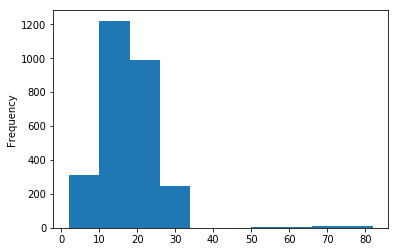

In [6]:
#Ya SABEMOS/podemos ver en que consisten esos datos
df.temperature_mean.plot(kind="hist")
#He incluso podemos detectar valores posiblemente anómalos: Grados por encima de 50º

In [2]:
print (df.index)
df.index = DatetimeIndex(df["idDate"])
print (df.index)

RangeIndex(start=0, stop=2801, step=1)
DatetimeIndex(['2015-11-28', '2015-11-29', '2012-06-19', '2015-11-20',
               '2015-11-21', '2015-11-22', '2015-11-23', '2015-11-24',
               '2015-11-25', '2015-11-26',
               ...
               '2009-01-16', '2009-01-15', '2009-01-18', '2009-08-07',
               '2010-07-13', '2006-10-08', '2016-04-08', '2007-10-26',
               '2009-09-13', '2011-10-18'],
              dtype='datetime64[ns]', name='idDate', length=2801, freq=None)


In [8]:
#La selección de datos(filas) se SIMPLIFICA enormemente
print (df["2015"]) #seleccionamos años #**

            Unnamed: 0      idDate  wind  temperature_mean
2015-11-28           0  2015/11/28   4.0              12.0
2015-11-29           1  2015/11/29   3.0              12.0
2015-11-20           3  2015/11/20   6.0              14.0
2015-11-21           4  2015/11/21  22.0              15.0
2015-11-22           5  2015/11/22   7.0              10.0
2015-11-23           6  2015/11/23  12.0               8.0
2015-11-24           7  2015/11/24   6.0               8.0
2015-11-25           8  2015/11/25   8.0               9.0
2015-11-26           9  2015/11/26  18.0              14.0
2015-11-27          10  2015/11/27  17.0              12.0
2015-10-09          33  2015/10/09   6.0              19.0
2015-10-08          34  2015/10/08   7.0              18.0
2015-10-05          35  2015/10/05  11.0              24.0
2015-10-04          36  2015/10/04   6.0              20.0
2015-10-07          37  2015/10/07   7.0              21.0
2015-10-06          38  2015/10/06  15.0              24

In [18]:
print (df["01/2015"].describe())
print ("-"*50)
print (df["01/2006":"01/2007"].wind.describe())

        Unnamed: 0       wind  temperature_mean
count    31.000000  31.000000         31.000000
mean    850.903226   6.516129          9.290323
std     202.153301   5.926612          1.716460
min     460.000000   1.000000          6.000000
25%     676.500000   3.000000          8.000000
50%     908.000000   5.000000          9.000000
75%     915.500000   7.000000         10.000000
max    1165.000000  27.000000         14.000000
--------------------------------------------------
count    64.000000
mean      8.406250
std       4.370604
min       3.000000
25%       5.750000
50%       7.000000
75%      10.000000
max      23.000000
Name: wind, dtype: float64


In [9]:
#Por tanto, se simplifica las operaciones útiles sobre los datos
print ("Viento medio en 2015 sobre Mallorca: %f" %df["2015"].wind.mean())
print ("Viento medio en 2014 sobre Mallorca: %f" %df["2014"].wind.mean())

Viento medio en 2015 sobre Mallorca: 7.586301
Viento medio en 2014 sobre Mallorca: 8.123288


In [ ]:
### Podemos hacer análisis más eficaces

In [8]:
yearMax = df.index.max().year
print (yearMax)
yearMin = df.index.min().year
print (yearMin)

2016
2005


In [17]:
import numpy as np
print np.arange(yearMin,yearMax)

[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [19]:
for year in np.arange(yearMin,yearMax):
    print ("Viento medio en %i sobre Mallorca: %f" %(year,df[str(year)].wind.mean()))

Viento medio en 2005 sobre Mallorca: 8.666667
Viento medio en 2006 sobre Mallorca: 8.400000
Viento medio en 2007 sobre Mallorca: 9.078652
Viento medio en 2008 sobre Mallorca: 8.859756
Viento medio en 2009 sobre Mallorca: 7.941634
Viento medio en 2010 sobre Mallorca: 7.611842
Viento medio en 2011 sobre Mallorca: 7.471429
Viento medio en 2012 sobre Mallorca: 7.980822
Viento medio en 2013 sobre Mallorca: 8.726027
Viento medio en 2014 sobre Mallorca: 8.123288
Viento medio en 2015 sobre Mallorca: 7.586301


In [22]:
#Y podemos seguir aplicando conceptos como la agrupación para hacerlo más eficiente
df.groupby(df.index.year).mean()["wind"] #**

2005    8.666667
2006    8.400000
2007    9.078652
2008    8.859756
2009    7.941634
2010    7.611842
2011    7.471429
2012    7.980822
2013    8.726027
2014    8.123288
2015    7.586301
2016    9.831933
Name: wind, dtype: float64

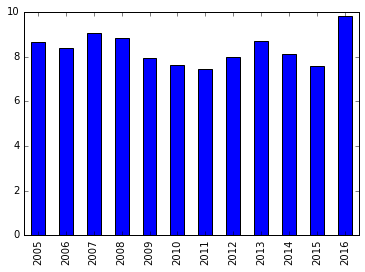

In [31]:
df.groupby(df.index.year).mean()["wind"].plot(kind="bar")

In [36]:
df["2015"].mean()["wind"]>df["2012"].mean()["wind"]

False

## Pero ¿cómo se gestiona el tiempo y qué funciones están implementadas sobre Pandas?

In [32]:
print df.index[:10]

DatetimeIndex(['2015-11-28', '2015-11-29', '2012-06-19', '2015-11-20',
               '2015-11-21', '2015-11-22', '2015-11-23', '2015-11-24',
               '2015-11-25', '2015-11-26'],
              dtype='datetime64[ns]', freq=None)


### Para comprender, la potencia de las fechas, crearemos series temporales más simples

In [20]:
index = pd.date_range('2000-1-1', periods=1000, freq='M')
print index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2082-07-31', '2082-08-31', '2082-09-30', '2082-10-31',
               '2082-11-30', '2082-12-31', '2083-01-31', '2083-02-28',
               '2083-03-31', '2083-04-30'],
              dtype='datetime64[ns]', length=1000, freq='M')


### La frecuencia es muy práctica para definir el periodo de tiempo 
## Tipos de frecuencia

- B       business day frequency
- C       custom business day frequency (experimental)
- D       calendar day frequency
- W       weekly frequency
- M       month end frequency
- BM      business month end frequency
- CBM     custom business month end frequency
- MS      month start frequency
- BMS     business month start frequency
- CBMS    custom business month start frequency
- Q       quarter end frequency
- BQ      business quarter endfrequency
- QS      quarter start frequency
- BQS     business quarter start frequency
- A       year end frequency
- BA      business year end frequency
- AS      year start frequency
- BAS     business year start frequency
- BH      business hour frequency
- H       hourly frequency
- T       minutely frequency
- S       secondly frequency
- L       milliseonds
- U       microseconds
- N       nanoseconds


In [24]:
index = pd.date_range('2000-1-1', periods=10, freq='MS')
print index
index = pd.date_range('2000-1-1', periods=10, freq='BM')
print index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01'],
              dtype='datetime64[ns]', freq='MS')
DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31'],
              dtype='datetime64[ns]', freq='BM')


#### Con estos datos podemos crear dataframes

In [30]:

import numpy as np
temperatura_dump = np.random.randint(0,30,size=10)
index_dump = pd.date_range('2000-1-1', periods=10, freq='BM')
df_dump = pd.DataFrame({"temperature":temperatura_dump},index=index_dump)
print (df_dump)
print (df_dump["01/2000":"03/2000"])

            temperature
2000-01-31           21
2000-02-29            4
2000-03-31           20
2000-04-28            8
2000-05-31           10
2000-06-30            5
2000-07-31           21
2000-08-31           28
2000-09-29           21
2000-10-31           13
            temperature
2000-01-31           21
2000-02-29            4
2000-03-31           20


### Las fechas tienen COMPONENTES

In [36]:
print (df_dump.index[0])
print (df_dump.index[0].year)
print (df_dump.index[0].day)
print (df_dump.index[0].is_quarter_start)

2000-01-31 00:00:00
2000
31
False


#### Componentes

<img src="files/timecomponentes.png">

### Sobre las fechas podemos realizar operaciones

In [10]:
from pandas.tseries.offsets import * ##todo esto lo importamos para no escribir toda la carrretilla del paquete 
dia = pd.datetime(2017,7,17,10,30)
print (dia)
print (dia + Day())
print (dia + Minute(59))

2017-07-17 10:30:00
2017-07-18 10:30:00
2017-07-17 11:29:00


In [11]:
#Los desplazamientos de fechas de una manera más generíca
print (dia + DateOffset(months=1, days=5))

2017-08-22 10:30:00


<img src="files/offsets.png">

In [57]:
#Lo podemos aplicar a series
index = pd.date_range('2000-1-1', periods=10, freq='MS')
print (index)
print (index+DateOffset(months=1)) 


DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01'],
              dtype='datetime64[ns]', freq='MS')
DatetimeIndex(['2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
               '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01',
               '2000-10-01', '2000-11-01'],
              dtype='datetime64[ns]', freq='MS')


In [68]:
print (index[1])
print (index[1]-Day(4))

2000-02-01 00:00:00
2000-01-28 00:00:00


# Resampling

Pandas ofrece la capacidad de "agrupar" las muestras en otros periodos de tiempo: resampling

In [79]:
index_dump = pd.date_range('2000-1-1', periods=3600, freq='S')
print (index_dump[:10])

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:00:01',
               '2000-01-01 00:00:02', '2000-01-01 00:00:03',
               '2000-01-01 00:00:04', '2000-01-01 00:00:05',
               '2000-01-01 00:00:06', '2000-01-01 00:00:07',
               '2000-01-01 00:00:08', '2000-01-01 00:00:09'],
              dtype='datetime64[ns]', freq='S')


In [82]:
ts = pd.Series(np.random.randint(0, 500, len(index_dump)), index=index_dump)
print (ts[:10])

2000-01-01 00:00:00    125
2000-01-01 00:00:01    129
2000-01-01 00:00:02    144
2000-01-01 00:00:03    426
2000-01-01 00:00:04    127
2000-01-01 00:00:05    124
2000-01-01 00:00:06    480
2000-01-01 00:00:07    215
2000-01-01 00:00:08    480
2000-01-01 00:00:09    288
Freq: S, dtype: int64


In [86]:
# Agrupamos las anteriores muestras en 1 Minuto !
ts.resample('1Min').sum()

2000-01-01 00:00:00    15199
2000-01-01 00:01:00    13853
2000-01-01 00:02:00    13817
2000-01-01 00:03:00    17474
2000-01-01 00:04:00    15700
2000-01-01 00:05:00    14131
2000-01-01 00:06:00    13557
2000-01-01 00:07:00    16168
2000-01-01 00:08:00    15324
2000-01-01 00:09:00    15232
2000-01-01 00:10:00    14576
2000-01-01 00:11:00    16131
2000-01-01 00:12:00    16063
2000-01-01 00:13:00    13779
2000-01-01 00:14:00    15630
2000-01-01 00:15:00    13102
2000-01-01 00:16:00    14055
2000-01-01 00:17:00    13004
2000-01-01 00:18:00    15889
2000-01-01 00:19:00    13712
2000-01-01 00:20:00    16175
2000-01-01 00:21:00    13806
2000-01-01 00:22:00    16260
2000-01-01 00:23:00    15667
2000-01-01 00:24:00    15972
2000-01-01 00:25:00    13928
2000-01-01 00:26:00    14980
2000-01-01 00:27:00    14452
2000-01-01 00:28:00    15508
2000-01-01 00:29:00    15903
2000-01-01 00:30:00    14470
2000-01-01 00:31:00    13742
2000-01-01 00:32:00    16775
2000-01-01 00:33:00    13857
2000-01-01 00:

In [88]:
ts.resample('1Min').max()

2000-01-01 00:00:00    490
2000-01-01 00:01:00    496
2000-01-01 00:02:00    496
2000-01-01 00:03:00    499
2000-01-01 00:04:00    497
2000-01-01 00:05:00    497
2000-01-01 00:06:00    474
2000-01-01 00:07:00    499
2000-01-01 00:08:00    493
2000-01-01 00:09:00    490
2000-01-01 00:10:00    491
2000-01-01 00:11:00    494
2000-01-01 00:12:00    493
2000-01-01 00:13:00    496
2000-01-01 00:14:00    489
2000-01-01 00:15:00    490
2000-01-01 00:16:00    470
2000-01-01 00:17:00    474
2000-01-01 00:18:00    496
2000-01-01 00:19:00    487
2000-01-01 00:20:00    473
2000-01-01 00:21:00    499
2000-01-01 00:22:00    482
2000-01-01 00:23:00    487
2000-01-01 00:24:00    498
2000-01-01 00:25:00    492
2000-01-01 00:26:00    459
2000-01-01 00:27:00    493
2000-01-01 00:28:00    494
2000-01-01 00:29:00    495
2000-01-01 00:30:00    498
2000-01-01 00:31:00    492
2000-01-01 00:32:00    480
2000-01-01 00:33:00    477
2000-01-01 00:34:00    476
2000-01-01 00:35:00    495
2000-01-01 00:36:00    499
2

### El resampling puede realizarse con frequencias no existentes.



In [89]:
ts = pd.Series(np.random.randint(0, 500, len(index_dump)), index=index_dump)
print ts[:10]

2000-01-01 00:00:00     75
2000-01-01 00:00:01    237
2000-01-01 00:00:02    323
2000-01-01 00:00:03    231
2000-01-01 00:00:04    483
2000-01-01 00:00:05    393
2000-01-01 00:00:06    225
2000-01-01 00:00:07     59
2000-01-01 00:00:08      7
2000-01-01 00:00:09    296
Freq: S, dtype: int64


In [93]:
ts[:4].resample('250L').asfreq() # 250 Milisegundos   

2000-01-01 00:00:00.000     75.0
2000-01-01 00:00:00.250      NaN
2000-01-01 00:00:00.500      NaN
2000-01-01 00:00:00.750      NaN
2000-01-01 00:00:01.000    237.0
2000-01-01 00:00:01.250      NaN
2000-01-01 00:00:01.500      NaN
2000-01-01 00:00:01.750      NaN
2000-01-01 00:00:02.000    323.0
2000-01-01 00:00:02.250      NaN
2000-01-01 00:00:02.500      NaN
2000-01-01 00:00:02.750      NaN
2000-01-01 00:00:03.000    231.0
Freq: 250L, dtype: float64

**Nota** La magnitud es el *Tipo de Frecuencia*

In [92]:
ts[:4].resample('250L').ffill()  # Rellena con  el valor existente anterior 

2000-01-01 00:00:00.000     75
2000-01-01 00:00:00.250     75
2000-01-01 00:00:00.500     75
2000-01-01 00:00:00.750     75
2000-01-01 00:00:01.000    237
2000-01-01 00:00:01.250    237
2000-01-01 00:00:01.500    237
2000-01-01 00:00:01.750    237
2000-01-01 00:00:02.000    323
2000-01-01 00:00:02.250    323
2000-01-01 00:00:02.500    323
2000-01-01 00:00:02.750    323
2000-01-01 00:00:03.000    231
Freq: 250L, dtype: int64

### Lo juntamos todo...

In [98]:
#Sobre nuestro fichero csv del clima de Mallorca...
#ya lo tenemos cargado en df
df.resample("12M").agg({"wind":np.mean,"temperature_mean":np.min})

,temperature_mean,wind
2005-06-30,25.0,14.000000
2006-06-30,10.0,7.684211
2007-06-30,9.0,9.440860
2008-06-30,6.0,8.105769
2009-06-30,5.0,8.932127
2010-06-30,4.0,7.602888
2011-06-30,4.0,7.453988
2012-06-30,2.0,7.453039
2013-06-30,5.0,9.241096
2014-06-30,5.0,8.221918


In [100]:
#Sobre nuestro fichero csv del clima de Mallorca...
df.resample("12M")["wind"].agg([np.mean,np.min,np.max])

,mean,amin,amax
2005-06-30,14.000000,14.0,14.0
2006-06-30,7.684211,4.0,17.0
2007-06-30,9.440860,3.0,32.0
2008-06-30,8.105769,3.0,28.0
2009-06-30,8.932127,3.0,43.0
2010-06-30,7.602888,1.0,39.0
2011-06-30,7.453988,1.0,28.0
2012-06-30,7.453039,0.0,30.0
2013-06-30,9.241096,2.0,32.0
2014-06-30,8.221918,1.0,31.0


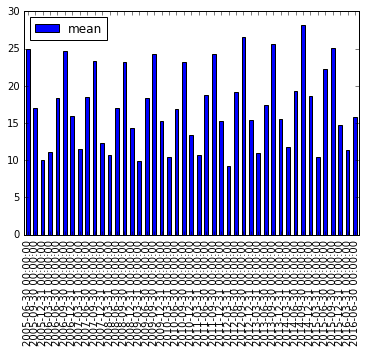

In [106]:
df.resample("3M")["temperature_mean"].agg([np.mean]).plot(kind="bar")

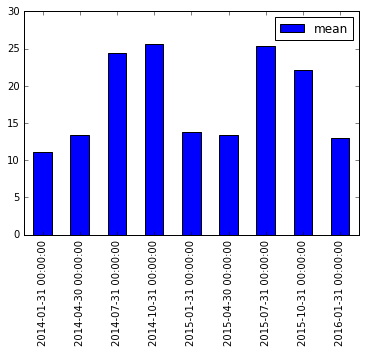

In [107]:
df["2014":"2015"].resample("3M")["temperature_mean"].agg([np.mean]).plot(kind="bar")

# Ejercicios
## Limpia el fichero del "climaMallora.csv" de posibles valores anomalos

In [10]:
df = df[df.temperature_mean < 40]
df

,Unnamed: 0,idDate,wind,temperature_mean
idDate,,,,
2015-11-28,0,2015/11/28,4.0,12.0
2015-11-29,1,2015/11/29,3.0,12.0
2012-06-19,2,2012/06/19,10.0,27.0
2015-11-20,3,2015/11/20,6.0,14.0
2015-11-21,4,2015/11/21,22.0,15.0
2015-11-22,5,2015/11/22,7.0,10.0
2015-11-23,6,2015/11/23,12.0,8.0
2015-11-24,7,2015/11/24,6.0,8.0
2015-11-25,8,2015/11/25,8.0,9.0


### 1 Crea una serie de tiempo, donde estén representados el primer día de cada mes, durante 2 años.


In [5]:
import numpy as np
index_dump = pd.date_range('2000-1-1', periods=24, freq='MS')
s = pd.Series(np.random.randint(0, 500, len(index_dump)), index=index_dump)
s

2000-01-01     94
2000-02-01      0
2000-03-01    218
2000-04-01    125
2000-05-01    368
2000-06-01     59
2000-07-01    444
2000-08-01     87
2000-09-01    356
2000-10-01    487
2000-11-01      9
2000-12-01    138
2001-01-01    210
2001-02-01    409
2001-03-01    489
2001-04-01    354
2001-05-01     76
2001-06-01    209
2001-07-01    495
2001-08-01     94
2001-09-01    127
2001-10-01     23
2001-11-01    186
2001-12-01      5
Freq: MS, dtype: int32

### 2 Genera una serie de tiempo cada evento a 15ms durante un día entero.


In [32]:
index_dump = pd.date_range('2000-1-1', periods=24*60*60*1000, freq='15L')
s = pd.Series(np.random.randint(0, 500, len(index_dump)), index=index_dump)
s

2000-01-01 00:00:00.000    262
2000-01-01 00:00:00.015    392
2000-01-01 00:00:00.030    359
2000-01-01 00:00:00.045     11
2000-01-01 00:00:00.060     13
2000-01-01 00:00:00.075    115
2000-01-01 00:00:00.090    364
2000-01-01 00:00:00.105    461
2000-01-01 00:00:00.120    343
2000-01-01 00:00:00.135    377
2000-01-01 00:00:00.150     38
2000-01-01 00:00:00.165    305
2000-01-01 00:00:00.180    176
2000-01-01 00:00:00.195    169
2000-01-01 00:00:00.210    121
2000-01-01 00:00:00.225    175
2000-01-01 00:00:00.240    216
2000-01-01 00:00:00.255    230
2000-01-01 00:00:00.270     35
2000-01-01 00:00:00.285    163
2000-01-01 00:00:00.300    336
2000-01-01 00:00:00.315    305
2000-01-01 00:00:00.330    446
2000-01-01 00:00:00.345    462
2000-01-01 00:00:00.360    325
2000-01-01 00:00:00.375    183
2000-01-01 00:00:00.390      3
2000-01-01 00:00:00.405    196
2000-01-01 00:00:00.420     71
2000-01-01 00:00:00.435    217
                          ... 
2000-01-15 23:59:59.550    342
2000-01-

### 3 ¿Cuál es el viento medio durante el mes de agosto de cada año?

In [38]:
de = df.resample("M")["temperature_mean"].agg([np.mean])
de[de.index.month == 8]

,mean
idDate,
2005-08-31,NaN
2006-08-31,25.000000
2007-08-31,24.000000
2008-08-31,24.222222
2009-08-31,25.384615
2010-08-31,24.148148
2011-08-31,25.258065
2012-08-31,28.032258
2013-08-31,25.258065


### 4 ¿Cuál es la diferencia de la temperatura media entre los meses de invierno y meses de verano durante 2014?

In [31]:
ver=df["06-21-2014":"09-20-2014"].temperature_mean.agg([np.mean])
invier=df["12-21-2014":"03-20-2015"].temperature_mean.agg([np.mean])

print ('La diferencia de temperatura entre verano del 14 y el invierno del 2014-2015 fue de: \n --> {:.4}Cº'.format(ver[0] - invier[0]))



La diferencia de temperatura entre verano del 14 y el invierno del 2014-2015 fue de: 
 --> 18.08Cº


### 5 ¿Cuántos días de “29/Febrero” hay en los datos de tiempo?

In [43]:
dias = df[(df.index.month == 2) & (df.index.day == 29)].idDate.count()
print ( 'La cantidad de 29 de febrero son: {}'.format(dias))

La cantidad de 29 de febrero son: 2
